In [19]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
S = 'susceptible'
I = 'infectado'
R = 'recuperado'
M = 'muerto'

duracion_infeccion = 4
probabilidad_infeccion = 0.4
probabilidad_recuperacion = 0.11

class Agente:
    def __init__(self, 
                 estado=None):
        self.tiempo_infectado = 0
        if not estado:
            self.estado = random.choice([S, I, R])
        else:
            self.estado = estado
            
    def actualiza_estado(self):
        if self.estado == I:
            if self.tiempo_infectado < duracion_infeccion:
                if random.random() <= probabilidad_recuperacion:
                    self.estado = R
                else:
                    self.tiempo_infectado += 1
            else:
                self.estado = M
            

t = []
def time_step(G):
    g = G.copy()

    # lista de infectados y muertos
    nodos_i = []
    nodos_m = []
    for n in g.nodes():
        if g.nodes[n]['agente'].estado == I:
            nodos_i.append(n)
        if g.nodes[n]['agente'].estado == M:
            nodos_m.append(n)

    # quiter muertos
    for n in nodos_m:
        g.remove_node(n)

    # infectados probablemente contagian a sus vecinos
    for n in nodos_i:
        for exposed in g.neighbors(n):
            if random.random() <= probabilidad_infeccion:
                g.nodes[exposed]['agente'].estado = I
                
    # actualiza estado de nodos
    for n in g.nodes():
        g.nodes[n]['agente'].actualiza_estado()

In [22]:
g.remove_node

In [10]:
import networkx as nx

G = nx.erdos_renyi_graph(100, 0.3)

for n in g.nodes():
    g.nodes[n]['agente'] = Agente()

   
nodos_s = []
nodos_r = []
nodos_i = []
for n in g.nodes():
    if g.nodes[n]['agente'].estado == S:
        nodos_s.append(n)
    if g.nodes[n]['agente'].estado == R:
        nodos_r.append(n)
    if g.nodes[n]['agente'].estado == I:
        nodos_i.append(n)

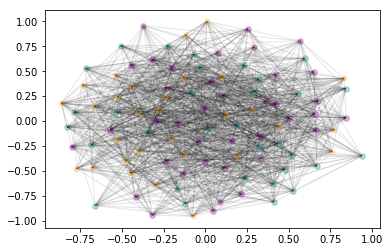

In [16]:
pos=nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos,
                       nodelist=nodos_i,
                       node_color='orange',
                       node_size=23,
                       alpha=0.3)
nx.draw_networkx_nodes(g, pos,
                       nodelist=nodos_s,
                       node_color='teal',
                       node_size=30,
                       alpha=0.3)
nx.draw_networkx_nodes(g, pos,
                       nodelist=nodos_r,
                       node_color='purple',
                       node_size=30,
                       alpha=0.3)
nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.1)
